## NYU Artificial Intelligence, programming session 1

### Part I Analogies and semantic networks

We consider the following Analogy problem (taken from Evan's paper). As indicated by the figure, the idea is to find the figure among 1 to 5 which to (c) what (b) is to (a) (the example is taken from the 1942 edition of the Psychological Test for College Freshmen of the American Council on Education)
                                           
<img src="Evans1.png" width=600/>

#### Exercise 1. Evans

Write a short python code to solve this problem. We will store the objects as dictionnary with the following fields: a name (unique identifier for each figure, you can choose it), a shape (for the moment, triangle, square and disk or circle), a size (we will consider three sizes : small, medium or large) we will add three more descriptive fields : 
- __fill__ (indicating whether the shape is filled (in which case there can't be any other shape inside), 
- __inside__ (which links the an object to the object that contains it (hence stores a pointer to the corresponding dictionnary), in other words, the current figure )
- __above__ (stores a pointer to the figure that is located below. I.e. the current figure is above the figure linked by __above__)

We will store each image as a list of the figures it contains. 

#### Exercise I.1. Generate a representation for the images shown above.
(here we will manually encode the representation although as indicated in the paper of Evans, the translation from the image through its list representation could easily be implemented by a simple scanner)

#### Exercise I.2. We now want to write a short program that will be able to solve the analogy problem above. 

For this, the idea is to implement a diagram similar to the one shown below. We decompose each figure into its objects. We then study how those objects change from (a) to (b) and apply the corresponding transformations to each of the object from the second image. Then compare with the figures 1 to 5 (following the idea of the diagram below) in order to find the matching figure.

Start by drawing the diagram (with pen and paper) relating (a) to (b) as shown below. Then apply the corresponding transformations to the new figure. 

Note that although you can start by assuming no scaling for simplicity, from (a) --> (b) it is a priori not clear whether it is the larger triangle which was retained or if it is the smaller one that was scaled up after deleting the small one. Ultimately your code should take the possibilities into account (i.e. this will actually be needed in I.3).  

<img src="Evans3.png" width=400/>

#### Exercise I.2 Use the code that you wrote above to solve the following analogy problem from Evan's


<img src="Evans2.png" width=600/>


#### Exercise I.4. A slightly more complex example

Apply your algorithm to solve the following Analogy problem

<img src="Evans6.png" width=600/>


#### Exercise I.5. A slightly more complex example (Part II)

Apply your algorithm to solve the following Analogy problem

<img src="Evans7.png" width=600/>



#### Exercise I.6. The first ambiguities (part I)

Refine your pipeline so that it can handle the ambiguous Analogy below.

<img src="Evans8.png" width=600/>




#### Exercise I.7. The first ambiguities (part II)

Refine the solution you provided for the previous exercises in order to solve the new analogy below. 

<img src="Evans4.png" width=600/>


#### Exercise I.8. Bonus (part II)

We now consider a more ambiguous problem where there is no direct matching in the sense described above. The example is again taken from Evan's seminal paper on ANALOGY. 


<img src="Evans5.png" width=600/>

__Hint:__ Start by trying the above/below relations encoded in the transformation between figure (a) and (b). if you can't get any match, one appoach consists in substituting one transformation for another (e.g. after checking that the original relation (above-below or vertical swap) cannot be applied, one can for example check the substitution of the vertical transformation for an horizontal one.)

### Part II Rational agents




We consider the vacuum cleaner world shown below. This world can be characterized as follows:

- The state of the environment is defined jointly by both the vacuum cleaner location and the dirt location. I.e. the agent is in either of two locations, each of which might contain dirt. In total there are thus $2\times 2^2 = 8$ (i.e. the vacuum cleaner can be in either of the two cells (exclusively) and there can be dirt everywhere) possible world states. 

- In this environment, each state has 3 associated actions: Left, Right and Suck (Larger envinronement will include the additional Up and Down moves)

- Any state can be defined as the initial state
- The actions have their respective effects except moving left in the leftmost square and moving right in the rightmost square

- The objective of the vacuum cleaner is for all the cells to be clean

- In this framework, we will consider that each step costs 1 so the total cost of a path is the number of steps in the path. 

<img src="vacuumCleaner1.png" width=400/>


#### Exercise II.1. 

Implement a performance measure environment simulator for the vacuum cleaner world. Your environment should be modular so that the sensors actuators and environment characteristics (size, shape, dirt placement can be changed easily)

#### Exercise II.2

Implement a simple reflex agent for the environment you just defined. Run the environment with this agent for all possible initial dirt configurations and agent locations. Record the performance score for each configuration and the overall average score. 

#### Exercise II.3

Consider a modified version of the vacuum environment in which geography of the environment (its extent, boundaries and obstacles) is unknown, as is the initial dirt configuration. (The agent can now go _Up_ and _Down_ as well as _Left_ and _Right_)

#### Exercise II.4

Extend the environments from above to the following stochastic frameworks:
    
   - 25% of the time, the "Suck" action fails to clean the floor if it is dirty an deposit dirt onto the floor if the floor is clean
   - At each time step, each clean square has a 10% chance of becoming dirty

### Part III Search Agents

In this third part, we will review the basic search algorithms and implement simple search agents. When trying to solve a general problem, the simplest approach is to discretize the space into the complete set of candidate solutions (which can be extremely greedy) and explore this space, through search algorithms to find an optimal solution (examples of applications involve route finding, equation solving, ...).


#### III.1. Revisions

In this first question, we will review basic search algorithms

There are several approaches at building trees in Python. The most common approach is to define the tree as a separate data structure (through a Node type for example). See below. 

In [29]:
class Node(object):

    def __init__(self, data): # initialize the node without children

        self._data = data
        self._children = []

    def getChildren(self):

        return self._children
    
    def getData(self):
        
        return self._data
    
    def addChild(self, child):
        
        self._children = self._children.append(child)
        
        


#### III.1.a Building a tree

Using the code above, store the tree given below as a tree object using the node class (or any other efficient approach you like). 

Note : you can tag the nodes as you like 

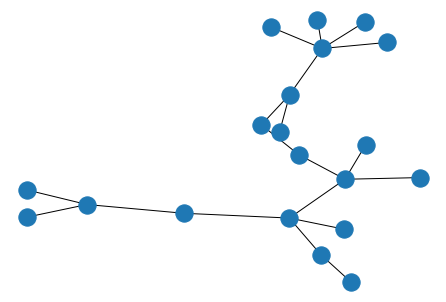

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
A = nx.random_tree(20)
nx.draw(A)

#### II.1.b

Once you have built the tree, explore this tree with 
- Breadth First Search 
- Depth First Search

and display the sequence of nodes.

#### Exercise III.2.a

Apply your Search agent to compute an optimal sequence of actions in a $3\times 3$ world whose initial state has has dirt in the three top cells and the agent is in the center of the $3\times 3$ grid.

#### Exercise III.2.b 

Evaluate the performance of your agent by generating a set of $3\times 3$ worlds with probability $0.2$ of dirt in each cell. Compare the efficiency of your agent with a simple randomized reflex agent that would suck where there is dirt and otherwise move randomly. 

#### Exercise III.3

The _Missionaries and cannibals_ problem can be stated as follows. Three missionaries and three cannibals are on one side of a river along with one boat that can hold one or two people. Find a way to get everyone to the other side without ever leaving a group of missionaries in one place outnumbered by the cannibals in that place. The problem is famous in AI because it was the subject of a first paper that approached problem formulation from an analytical viewpoint (Amarel 1968)

 - Formulate the problem precisely, making only those distinctions necessary to ensure a valid solution. Draw a diagram of the complete state space.
 
 - Implement and solve the problem optimally using an appropriate search algorithm. 
   

#### Exercise III.4

We consider the problem of finding the shortest path between between two points on a plane that has convex polygonal obstacles as show below. This can be considered as an idealization of the problem that a robot has to solve to navigate in a crowded environment. 

<img src="Maze3.png" width=500/>


 - A efficient approach in such an environment is to consider the straight line between the vertices of any two shapes to be the shortest path between those vertices. Using this idea, how would you define the sate space? How large is that space?
 
 - Define the necessary functions to implement the search problem, including an action function that takes a vertex as input and returns a set of vectors, each of which maps the current vertex to one of the vertices that can be reached in a straight line (do not forget th neighbors on the same polygon). You can use the straight line distance as your heuristic function.
 
 - Apply one or more of the search algorithms covered during the lectures and comment on their performance.

#### Exercise III.5. 

Consider the 8 puzzle below. 

<img src="8puzzle.png" width=300/>

This puzzle consists of a $3\times 3$ board with $8$ numbered tiles and a blank space. A tile adjacent to the space can slide into the blank space. The objective is to reach a specific goal state such as the one shown on the right. Concretely in the $8$ puzzle, 

- The state is defined by the location of the 8 tiles as well as the blank space on the 3 by 3 grid 
- Any state can be defined as the initial state. 
- The simplest formulation defines actions as movements of the blank space (left, right, up or down). 
- The transition model takes an action and a state and returns the resulting new state.
- The objective is to reach the goal configuration 
- As usual, each step costs $1$ so the total cost is the length of the path. 

#### III.5.a 

Try to solve this problem with $A^*$ first and RBFS. Use as your heuristics 
 - $h_1 = \text{Misplaced tiles}$ and 
 - $h_2 = \text{Manhattan distance}$. 
 
 Compare the performance of RBFS and $A^*$ for those two heuristics. 


#### III.5.b 

In the exercise above, we considered two simple heuristics: the Manhattan distance and the misplaced tiles. Several other heuristics have been introduced in the litterature to improve the resolution of the puzzle. Check Nilson (1971), Mostow and Prieditis (1989) as well as Hansson et al. (1989). Test the conresponding heuristics and compare them to the results you get from the Manhattan and misplaced tiles approaches.
